In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
import warnings

Suppress warnings

In [28]:
warnings.filterwarnings('ignore')

Load the dataset

In [29]:
df = pd.read_csv('/home/ducanh/Credit Card Transactions Fraud Detection/modified_data.csv')

Display basic dataset information

In [30]:
print(df.head())
print(df.info())

           ssn            cc_num      first      last gender  \
0  024-79-2449    30417925130692    Felicia     Gomez      F   
1  269-54-1394  4224979584238239    Jeffrey   Mathews      M   
2  527-16-1817  4056555304074394  Christina     Ellis      F   
3  314-98-4472  6011544296258081     Steven    Murphy      M   
4  390-83-9961   374917808855764    Cynthia  Martinez      F   

                          street              city state    zip      lat  ...  \
0           486 Benson Stravenue          Rockford    IL  61107  42.2786  ...   
1     5430 Leslie Flat Suite 854             Ceres    CA  95307  37.5833  ...   
2      75933 Harvey Via Apt. 423           Buffalo    NY  14224  42.8371  ...   
3   268 Anderson Valley Apt. 958  Mansfield Center    CT   6250  41.7698  ...   
4  53164 Deborah Square Apt. 739           Anaheim    CA  92804  33.8186  ...   

   customer_avg_amount_7_day  customer_avg_amount_30_day  \
0                      18.27                        6.97   
1       

In [31]:
print(f"Number of duplicated transactions: {df['trans_num'].duplicated().sum()}")
print(f"Number of unique cardholders: {len(df['cc_num'].unique())}")
print("\nSummary Statistics:")
print(df.describe())

Number of duplicated transactions: 0
Number of unique cardholders: 9968

Summary Statistics:
             cc_num           zip           lat          long      city_pop  \
count  8.580255e+06  8.580255e+06  8.580255e+06  8.580255e+06  8.580255e+06   
mean   3.700648e+17  5.157227e+04  3.744883e+01 -9.216084e+01  2.907052e+05   
std    1.234194e+18  2.976302e+04  5.231915e+00  1.661300e+01  5.600755e+05   
min    6.040027e+10  1.002000e+03  1.943860e+01 -1.621739e+02  8.900000e+01   
25%    3.865393e+13  2.789200e+04  3.382300e+01 -9.868340e+01  1.759700e+04   
50%    3.507852e+15  4.820700e+04  3.841750e+01 -8.743240e+01  6.076300e+04   
75%    4.551310e+15  7.825800e+04  4.112220e+01 -8.006100e+01  2.298070e+05   
max    4.999685e+18  9.983300e+04  6.485440e+01 -6.747220e+01  2.906700e+06   

           acct_num     unix_time           amt      is_fraud     merch_lat  \
count  8.580255e+06  8.580255e+06  8.580255e+06  8.580255e+06  8.580255e+06   
mean   4.956350e+11  1.667116e+09  7.

Visualize fraud vs non-fraud transactions

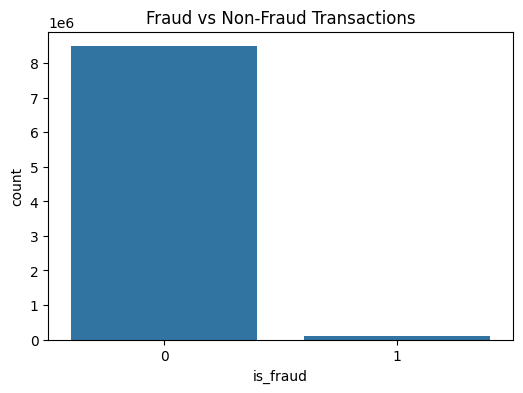

In [32]:
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=df)
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()

Calculate and display fraud statistics

In [33]:
fraud_count = df['is_fraud'].value_counts()
non_fraud_count = fraud_count[0]
fraud_transactions = fraud_count[1]
print(f"Number of non-fraud transactions: {non_fraud_count}")
print(f"Number of fraud transactions: {fraud_transactions}")

Number of non-fraud transactions: 8485449
Number of fraud transactions: 94806


In [34]:
total_transactions = len(df)
non_fraud_rate = (non_fraud_count / total_transactions) * 100
fraud_rate = (fraud_transactions / total_transactions) * 100
print(f"Rate of non-fraud transactions: {non_fraud_rate:.2f}%")
print(f"Rate of fraud transactions: {fraud_rate:.2f}%")

Rate of non-fraud transactions: 98.90%
Rate of fraud transactions: 1.10%


Visualize transaction amount distribution

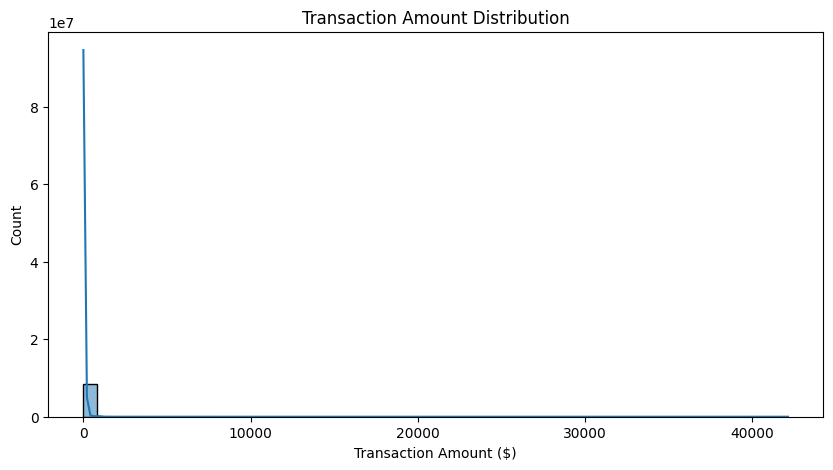

In [35]:
plt.figure(figsize=(10, 5))
sns.histplot(df['amt'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount ($)')
plt.show()

KDE plot for fraudulent vs non-fraudulent transactions

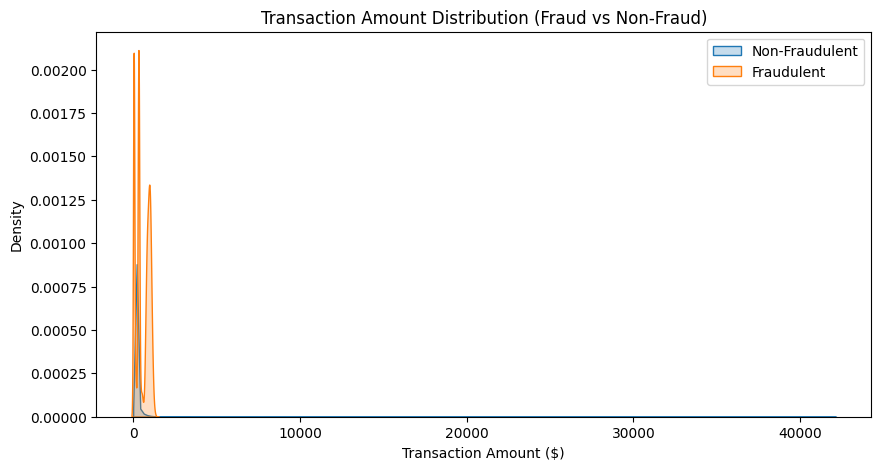

In [36]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df[df['is_fraud'] == 0]['amt'], label='Non-Fraudulent', shade=True)
sns.kdeplot(df[df['is_fraud'] == 1]['amt'], label='Fraudulent', shade=True)
plt.title('Transaction Amount Distribution (Fraud vs Non-Fraud)')
plt.xlabel('Transaction Amount ($)')
plt.legend()
plt.show()

Handle 'dob' column if present

In [37]:
if 'dob' in df.columns:
    df['dob'] = pd.to_datetime(df['dob'], errors='coerce')
    df['cust_age'] = 2025 - df['dob'].dt.year

Correlation heatmap for numeric columns

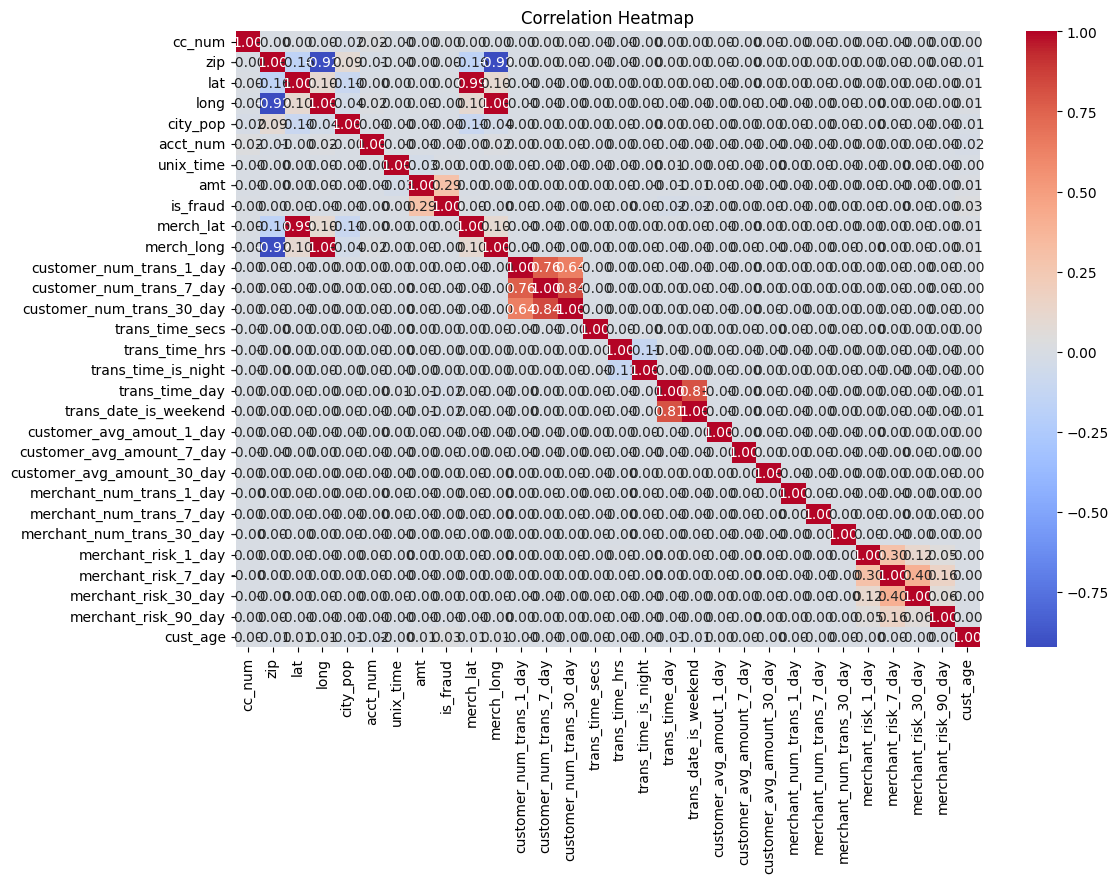

In [38]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Prepare data for training

In [39]:
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

Split data into training and testing sets

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

Drop irrelevant columns

In [41]:
drop_cols = ['ssn', 'first', 'last', 'street', 'city', 'state', 'profile', 'trans_num', 'dob', 'trans_date_trans_time']
X_train.drop(columns=drop_cols, errors='ignore', inplace=True)
X_test.drop(columns=drop_cols, errors='ignore', inplace=True)

Encode categorical columns

In [42]:
categorical_cols = ['gender', 'job', 'category', 'merchant']
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))

Standardize numerical features

In [43]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

Logistic Regression

In [44]:
print("\n---- Logistic Regression ----")
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train_sc, y_train)


---- Logistic Regression ----


LogisticRegression(class_weight='balanced')

Evaluate Logistic Regression

In [45]:
y_train_pred_lr = lr.predict(X_train_sc)
y_test_pred_lr = lr.predict(X_test_sc)
print(f'Recall Score on Train Data: {recall_score(y_train, y_train_pred_lr)}')
print(f'Recall Score on Test Data: {recall_score(y_test, y_test_pred_lr)}')

Recall Score on Train Data: 0.7645938287153652
Recall Score on Test Data: 0.7625455475292463


Feature importance for Logistic Regression

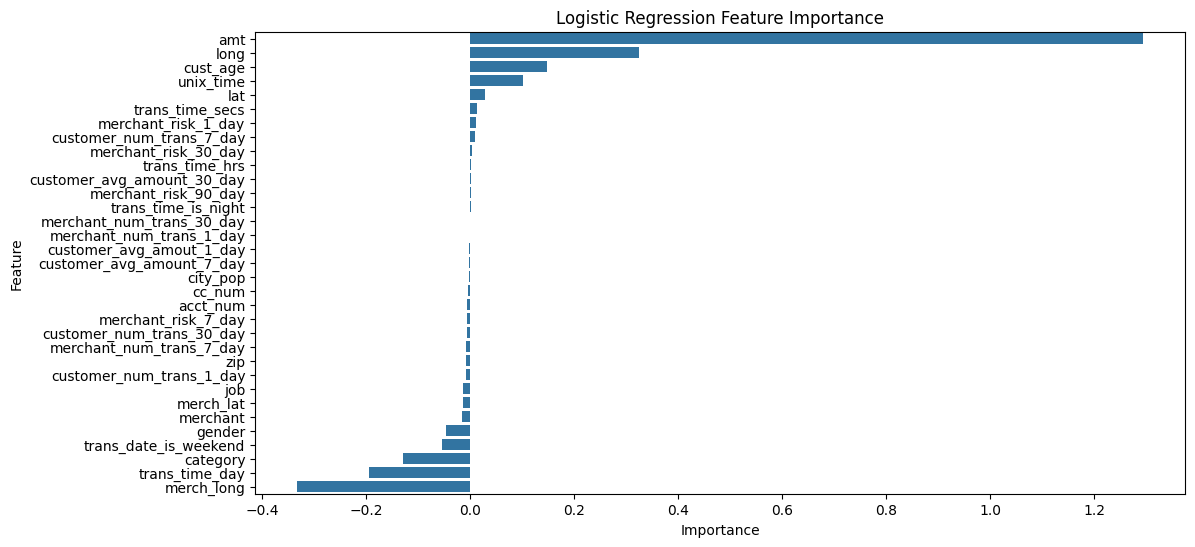

In [46]:
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Importance': lr.coef_.flatten()})
coefficients.sort_values(by='Importance', ascending=False, inplace=True)
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=coefficients)
plt.title('Logistic Regression Feature Importance')
plt.show()

Random Forest

In [47]:
print("\n---- Random Forest ----")
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)


---- Random Forest ----


RandomForestClassifier(class_weight='balanced', random_state=42)

Evaluate Random Forest

In [48]:
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)
print(f'Recall Score on Train Data: {recall_score(y_train, y_train_pred_rf)}')
print(f'Recall Score on Test Data: {recall_score(y_test, y_test_pred_rf)}')

Recall Score on Train Data: 0.9999685138539043
Recall Score on Test Data: 0.7088793709646487


Feature importance for Random Forest

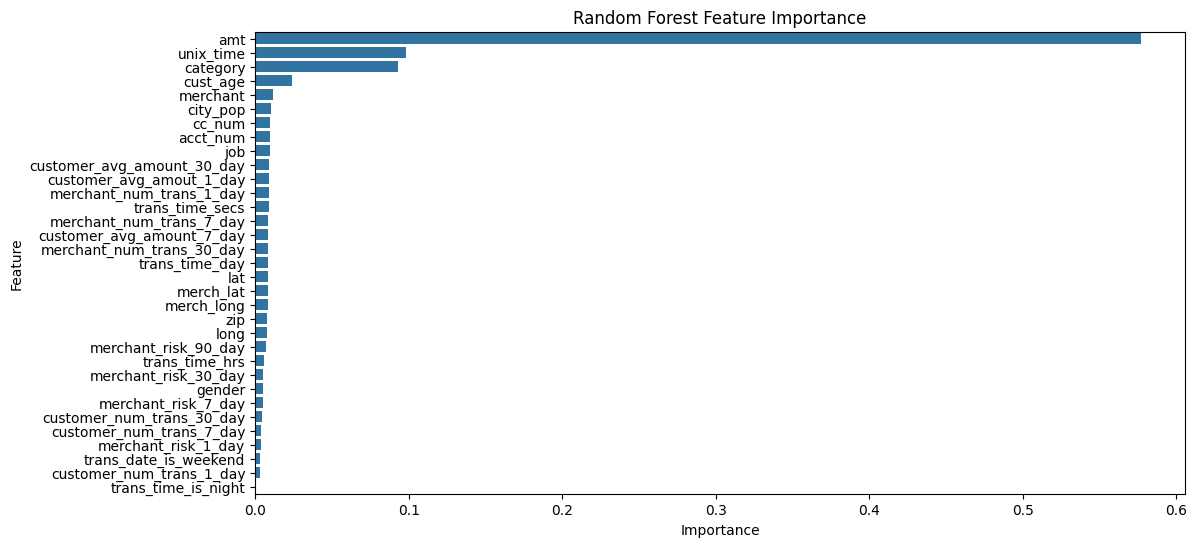

In [49]:
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Random Forest Feature Importance')
plt.show()